## 회귀 모델
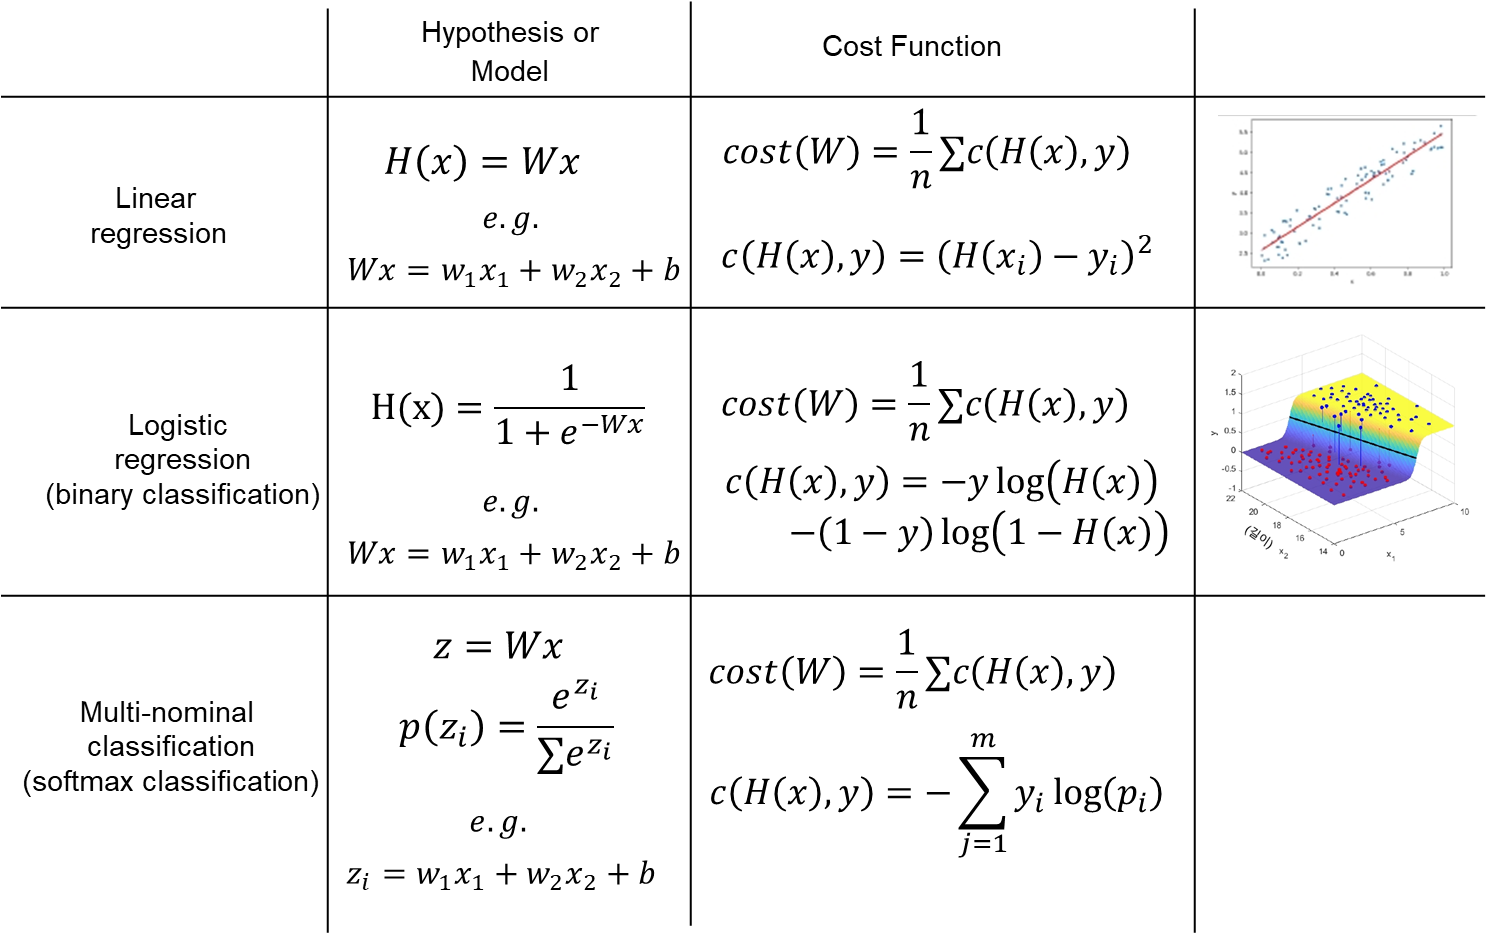



## 다중 분류 - Softmax
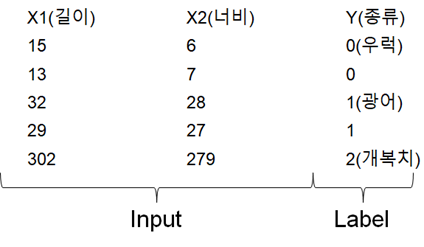  
2개의 input (길이, 너비)를 이용하여 y 값을 분류 (우럭, 광어, 개복치) 하는 모델 개발
이때 분류되는 y값은 0, 1, 2 총 3가지 이므로 다중 분류에 해당함.

#### 모델 개발 순서

1. 모델 정의 (Linear, Logistic, Multi-nominal)  

2. Cost function 정의 (Mean-squared error (MSE), Binary CrossEntropy, Categorical CrossEntropy)  

3. Cost function을 최소화 하는 방향으로 모델 파라미터 최적화 (Gradient Descent)  
  
    3.1) GradientTape 을 통한 gradient 계산
   
    3.2) $w_{new} = w_{old} - \alpha \nabla cost$을 통한 새로운 w 를 반복적으로 구함.  
      - 해당 계산은 두가지 tensorflow 함수를 통해  계산됨.
      - W.assign_sub($\alpha$ * grad)    
      - optimizer.apply_gradients(zip(grad, [W,b]))  # 사전에 optimizer를 정의하여야함.


### 다중분류 데이터 생성 / One-hot encoding



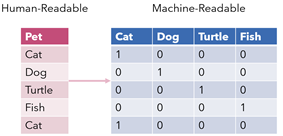

In [24]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(0)

# 1. 데이터 생성
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]

y_data = [2, 2, 2, 1, 1, 1, 0, 0]  # 수정된 y_data

# numpy 배열로 변환 및 데이터 타입 설정
x_data = np.asarray(x_data, dtype=np.float32) 
y_data = np.asarray(y_data, dtype=np.float32)

print(np.unique(y_data)) # 유니크한 y 값 출력
nb_classes = 3 # 클래스 개수 설정

# y_data를 원-핫 인코딩으로 변환
print(y_data)
y_data = tf.one_hot(y_data.astype(np.int32), nb_classes)
print(y_data)
# x_data와 y_data의 shape 출력
print('x shape:', x_data.shape)
print('y shape:', y_data.shape)


[0. 1. 2.]
[2. 2. 2. 1. 1. 1. 0. 0.]
tf.Tensor(
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]], shape=(8, 3), dtype=float32)
x shape: (8, 4)
y shape: (8, 3)


 ### 다중 분류 모델 및 함수 정의


In [25]:
def model(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)
    # X = (num of data, size of input) = (8, 4)
    # W = (size of input, size of output) = (4, 3)
    

def loss_fn(X, Y):
    probs = model(X)
    #logits in 이진분류 : logits = log (odds) (-inf ~ inf)
    #Logits in Multi-classification : Logits = Wx (-inf ~ inf)
    cost = -tf.reduce_sum(Y * tf.math.log(probs), axis=1)  # 수정: 비용 계산 부분
    cost_mean = tf.reduce_mean(cost)
    return cost_mean

def accuracy_fn(predicted, labels):
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy


### 다중 분류 학습 및 예측


In [26]:
# 훈련 설정
EPOCHS = 2000
W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
print(W.shape, x_data.shape)
# 훈련 루프
for i in range(EPOCHS):
    with tf.GradientTape() as tape:
        loss = loss_fn(x_data, y_data)
    grads = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(grads, variables))
    if (i + 1) % 100 == 0:
        print('Loss at epoch {:5}: {:5.4f}'.format(i + 1, loss.numpy()))
print('Label:', np.argmax(y_data, 1))
print('Pred:', np.argmax(model(x_data).numpy(), 1))
print('Accuracy:', accuracy_fn(np.argmax(model(x_data).numpy(), 1), np.argmax(y_data, 1)).numpy())


(4, 3) (8, 4)
Loss at epoch   100: 0.7915
Loss at epoch   200: 0.6936
Loss at epoch   300: 0.6335
Loss at epoch   400: 0.5822
Loss at epoch   500: 0.5327
Loss at epoch   600: 0.4876
Loss at epoch   700: 0.4424
Loss at epoch   800: 0.3978
Loss at epoch   900: 0.3531
Loss at epoch  1000: 0.3098
Loss at epoch  1100: 0.2665
Loss at epoch  1200: 0.2381
Loss at epoch  1300: 0.2263
Loss at epoch  1400: 0.2157
Loss at epoch  1500: 0.2061
Loss at epoch  1600: 0.1972
Loss at epoch  1700: 0.1890
Loss at epoch  1800: 0.1814
Loss at epoch  1900: 0.1745
Loss at epoch  2000: 0.1679
Label: [2 2 2 1 1 1 0 0]
Pred: [2 2 2 1 1 1 0 0]
Accuracy: 1.0


### 실습. 삼각형 분류 문제
3번의 길이 (x1, x2, x3) 가 주어졌을 떄 삼각형이 예각인지 둔각인지 정삼각형이 맞추는 모델 개발  
클래스는 예각삼각형(2), 정삼각형(0), 둔각삼각형(1)으로 구성되어 있습니다.  
각 변의 길이는 원할한 학습을 위해 길이가 짧은 순으로 정렬되어 있습니다.
파일 명 'triangular_dataset.csv'


In [47]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(0)
data = np.loadtxt('triangle_dataset.csv',delimiter =',')



[0. 1. 2.]
(1500, 3) tf.Tensor(
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]], shape=(1500, 3), dtype=float32)
